<a href="https://colab.research.google.com/github/ucfilho/ANN_raianars/blob/master/ANN_parte_005_ANN_SET_20_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statistics as st
from sklearn.metrics import confusion_matrix

# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
imput_ANN.zip		 X_DAT_set_17_2019.csv	  Y_DAT_set_17_2019.csv
X_DAT_B_set_17_2019.csv  Y_DAT_B_set_17_2019.csv
Hello world
I'm evolving!!!



In [0]:
# funcao normatiza dados
def Normatiza_old(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:

# funcao retorna os dados a forma original
def Original_old(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        sd_x=st.stdev(x[i])
        mean_x=st.mean(x[i])
        x[i]=(x[i]-mean_x)/sd_x
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        sd_x=st.stdev(x_old[i])
        mean_x=st.mean(x_old[i])
        x[i]=x[i]*sd_x+mean_x
    return x

In [0]:
# leitura dos dados
DAT=pd.read_csv("X_DAT_B_set_17_2019.csv")
DAT_Y=pd.read_csv("Y_DAT_B_set_17_2019.csv")

In [7]:
strings=list(DAT_Y)
print(strings)

['Unnamed: 0', 'NP', 'F', 'CR']


In [8]:
for i in range(len(DAT_Y['CR'])):
  if(DAT_Y['CR'][i]<1):
    DAT_Y['CR'][i]=0
  else:
    DAT_Y['CR'][i]=1





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
DAT_OLD=[]
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)

#DAT_OLD_Y=[]
#DAT_OLD_Y=DAT_Y.copy()
#DAT_Y=Normatiza(DAT_Y)
#print(DAT_Y['CR'])

In [0]:
#print(DAT_OLD_Y)

In [0]:
#print(DAT_OLD_Y)

In [0]:
#for i in range(len(DAT_Y['CR'])):
#  print(DAT_Y['NP'][i])

In [0]:
#print(DAT_OLD_Y)
#for i in range(len(DAT_Y['CR'])):
#  print(DAT_Y['NP'][i])

In [0]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
FRAC=0.8 # dados em treino
train=DAT.sample(frac=FRAC,random_state=78) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
x_train=train.iloc[:,[1,2,3,4,5,6]]
x_test=test.iloc[:,[1,2,3,4,5,6]]
X_OLD=DAT_OLD.iloc[:,[1,2,3,4,5,6]]
#print(x_train)

In [0]:
# obtem as variaveis dependentes (treino e teste)
train=DAT_Y.sample(frac=FRAC,random_state=878) # poderia ser frac=0.5? sim ou nao?
test=DAT_Y.drop(train.index)
Index=[3]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
#Y_OLD=DAT_OLD.iloc[:,Index]
#print(y_train)

In [0]:
#Num=len(y_train)
#print(Num)


In [0]:
#for i in range(len(y_train)):
#  print(y_train.iloc[i,0])

In [0]:
#print(y_train)

In [0]:
#print(y_train)

In [0]:
#print(DAT_Y)

In [20]:
# define a rede neural 
#clf = MLPRegressor(solver='lbfgs',activation='tanh',max_iter=500000,alpha=1e-5,
#clf = MLPRegressor(solver='lbfgs',activation='logistic',max_iter=500000,alpha=1e-5,
                  # hidden_layer_sizes=(8),#out_activation='purelin',
                  # random_state=None)
clf = MLPClassifier(solver='lbfgs',activation='logistic',max_iter=500000,alpha=1e-5,
                   hidden_layer_sizes=(8),#out_activation='purelin',
                   random_state=None)
# ??? self.out_activation_ = 'identity'
# treina a rede neural
clf.fit(x_train, y_train)

# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#print(clf)

In [0]:
#print(y_calc_test)


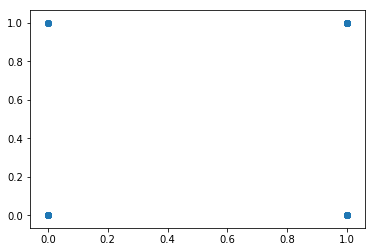

In [22]:
plt.scatter(y_train,y_calc_train)

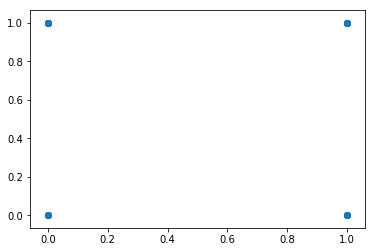

In [23]:
plt.scatter(y_test,y_calc_test)

In [0]:
#print(max(y_calc_test))
#print(y_calc_test.index(max(y_calc_test)))
#item=max(y_calc_test)
#item_index = np.where(y_calc_test==item)
#print(item_index)


In [0]:
#print(y_calc_test[17])
#print(x_test.iloc[17,:])
#print(y_test[17])

In [25]:
print(x_test)

     DI RELATIVO  FRAC Its  VELOC FOBJ   VELOC X  DELTA FOBJ  DELTA VX
3      -1.307837 -0.374641   -0.036178  1.001366    1.042963 -0.128829
12     -1.393240 -0.542292    1.184827 -1.196754   -0.130370 -1.709913
20     -0.178788 -0.783546    1.184827 -1.196754    1.042963 -1.709913
23     -0.453701  0.524951    1.184827 -1.196754   -0.130370 -1.709913
28     -1.387629 -1.078542    1.184827 -0.097694    2.216297  0.661713
29     -1.393350 -0.920822    1.184827 -0.097694   -0.130370 -0.128829
30     -1.393410 -0.710527    1.184827 -0.097694   -0.130370 -0.128829
32     -1.393413  0.235796    1.184827 -0.097694   -0.130370 -0.128829
38     -1.381695 -0.920822    1.184827 -0.097694   -0.130370 -0.919371
40     -1.249369 -0.272415   -0.036178 -1.196754   -1.303704 -0.919371
43     -1.393413  1.147071    1.184827 -0.097694   -0.130370 -0.128829
54      0.518748 -1.355605   -1.257182 -1.196754   -0.130370 -0.128829
66      0.765962 -0.765396    1.184827  1.001366   -0.130370 -0.128829
68    

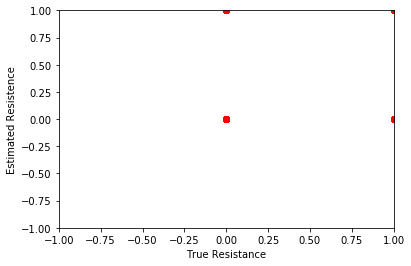

In [26]:
plt.scatter(y_train,y_calc_train)
plt.scatter(y_test,y_calc_test,color='r')
plt.xlabel("True Resistance")
plt.ylabel("Estimated Resistence")
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

In [27]:
mse=mean_squared_error(y_train,y_calc_train)
print("MSE train=",mse)
R2=r2_score(y_train,y_calc_train)
print("R^2 train=",R2)

MSE train= 0.12037037037037036
R^2 train= 0.514354894500173


In [28]:
mse=mean_squared_error(y_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.5925925925925926
R^2 teste= -1.454545454545455


In [29]:


y_calc_test=pd.DataFrame(y_calc_test)
y_calc_test.columns = ["y_calc"]
#print(y_calc_test)
#df_confusion = pd.crosstab(y_test,y_calc_test)
df_confusion = confusion_matrix(y_test,y_calc_test)
print(df_confusion)


[[ 5 11]
 [ 5  6]]


In [30]:
print(y_test)

      CR
3    0.0
11   1.0
12   1.0
21   0.0
26   0.0
27   1.0
28   0.0
29   1.0
31   0.0
34   1.0
49   0.0
50   1.0
60   0.0
67   0.0
69   0.0
73   1.0
76   1.0
79   1.0
81   1.0
95   0.0
97   0.0
101  0.0
114  0.0
115  0.0
117  0.0
119  1.0
131  0.0


In [31]:
print(y_calc_test)

    y_calc
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     0.0
11     0.0
12     1.0
13     0.0
14     1.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     1.0
23     0.0
24     1.0
25     1.0
26     1.0
